## Assignment 2 : Machine Learning

I chose a regression algorithm for predicting the number of passengers on a specific date for a specific bus because the output variable, (the number of passengers), is a continuous numerical value, and the goal is to make quantitative predictions (predictions that provide specific numerical values as outcomes). 

Regression algorithms are well-suited for these tasks as they are designed to model and predict numerical outcomes. By using regression, we aim to find a mathematical relationship between the input variables (date) and the target variable (number of passengers), allowing us to make accurate, data-driven predictions.

In [118]:
%matplotlib inline

import datetime as dt

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from pandas.api.types import is_numeric_dtype

from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Analysis

In [119]:
# Load dataset
url = "data\Ruter-data.csv"
df = pd.read_csv(url, sep=";")
df = df[["Dato", "Linjenavn", "Passasjerer_Ombord"]]
df = df.dropna()

In [120]:
# Look at the dataset
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10


In [121]:
# Look at dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dato                6000 non-null   object
 1   Linjenavn           6000 non-null   object
 2   Passasjerer_Ombord  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [122]:
# Look at statistics for each numerical column in the dataset
df.describe()

,Passasjerer_Ombord
count,6000.000000
mean,4.512833
std,6.735730
min,-39.000000
25%,0.000000
50%,3.000000
75%,7.000000
max,64.000000


<Axes: xlabel='Dato', ylabel='Passasjerer_Ombord'>

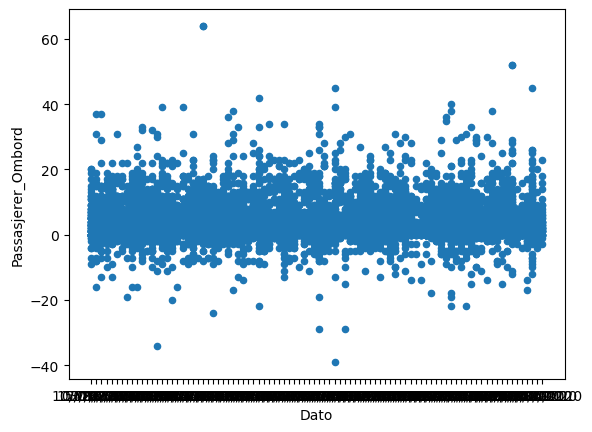

In [123]:
df.plot.scatter(x = 'Dato', y = 'Passasjerer_Ombord')

## Data Preparation

In [124]:
# We see in df.describe and df.plot that the minimum value of passengers on board is below zero
# Since this is not a possible value for the number of passengers, I'm going to drop all data points with passengers on board less than 0
df = df[df["Passasjerer_Ombord"]>=0]
df.describe()

,Passasjerer_Ombord
count,5333.000000
mean,5.601163
std,6.160011
min,0.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,64.000000


In [125]:
# In order to create a model with the most accuracy from this data set, I want to use the route that occurs most often in the data set
# Count the occurrences of each unique Linjenavn
lineCounts = df["Linjenavn"].value_counts()

# Find the line with the most datapoints
mostCommonLine = lineCounts.idxmax()
mostCommonLineCount = lineCounts.max()

# Print the result
print(f"Most common line : {mostCommonLine}\nAmount of data : {mostCommonLineCount}")

Most common line : 100
Amount of data : 423


In [126]:
# The chosen line for this assignment, is line number 100, as assigned to 'mostCommonLine'
df = df[df["Linjenavn"] == mostCommonLine]
df.describe()

,Passasjerer_Ombord
count,423.000000
mean,8.513002
std,7.599838
min,0.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,40.000000


<Axes: >

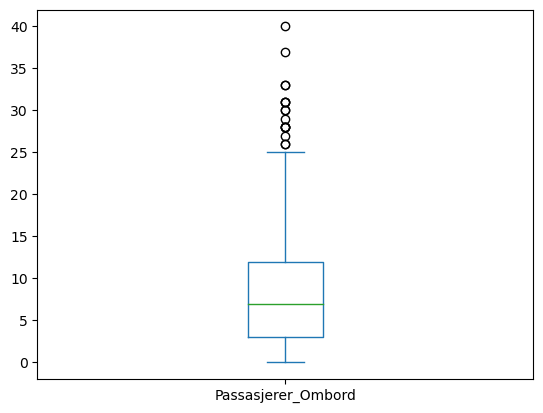

In [127]:
# Find outliers
df['Passasjerer_Ombord'].plot.box()

<Axes: >

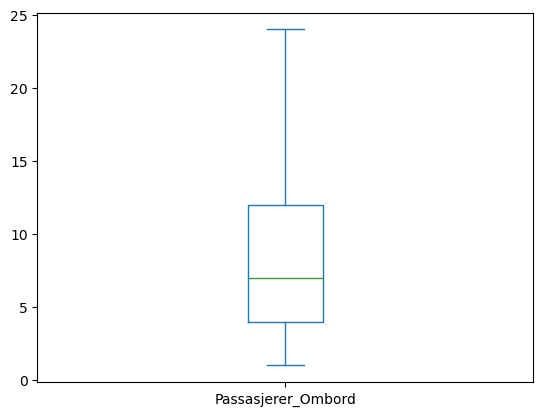

In [128]:
# Remove outliers

# Define the quantile thresholds
low_threshold = 0.05
high_threshold = 0.95

# Calculate quantiles for 'Passasjerer_Ombord' column
quantiles = df['Passasjerer_Ombord'].quantile([low_threshold, high_threshold])

# Filter the data to remove outliers
passengers = df['Passasjerer_Ombord']
isOutlierInLowThreshold = passengers > quantiles.loc[low_threshold]
isOutlierInHighThreshold = passengers < quantiles.loc[high_threshold]
filtered_passengers = passengers[(isOutlierInLowThreshold) & (isOutlierInHighThreshold)]

# Update the 'Passasjerer_Ombord' column with the filtered data
df['Passasjerer_Ombord'] = filtered_passengers

# Plot the boxplot
filtered_passengers.plot.box()

In [129]:
df = df.dropna()

## Data Processing

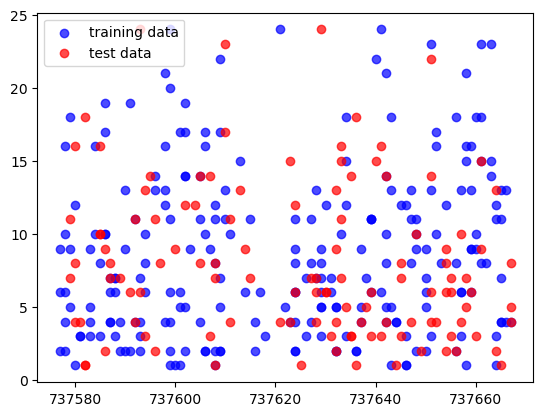

In [130]:
# Convert dates
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')
df['Dato'] = df['Dato'].map(dt.datetime.toordinal)

# Setting up x and y axis with date and passenger respectively
X = pd.DataFrame(df['Dato'])
Y = pd.DataFrame(df['Passasjerer_Ombord'])

# Split the set in a training (67%) and a testing (33%) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Visualize
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='red')
plt.legend()
plt.show()

## Train Model

In [131]:
# Create a linear regression model and train it
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,Y_train)

LinearRegression()

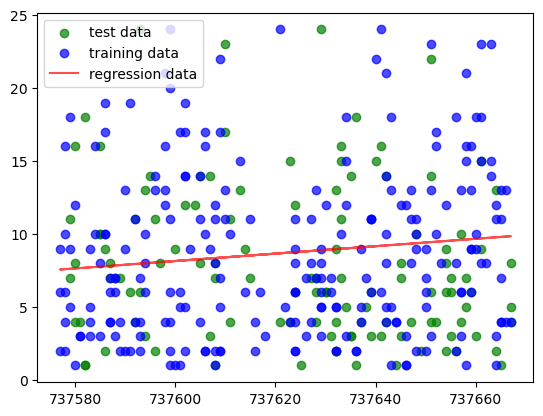

Mean Squared Error for training data = 32.12910662490952


In [132]:
# Predict the target variable (Y) values for the training data using the trained linear regression model
Y_pred = linearRegressor.predict(X_train)

# Create a scatter plot of the test data points
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='green')
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')

# Create a line plot showing the model's predictions for the training data
# This line represents the regression model's prediction for the training data points
plt.plot(X_train, Y_pred, label="regression data", alpha=0.7, color="red")

plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) for the training data
# MSE measures the average squared difference between actual and predicted values for the training data
mseTrain = metrics.mean_squared_error(Y_train, linearRegressor.predict(X_train))
print(f'Mean Squared Error for training data = {mseTrain}')

## Test Model

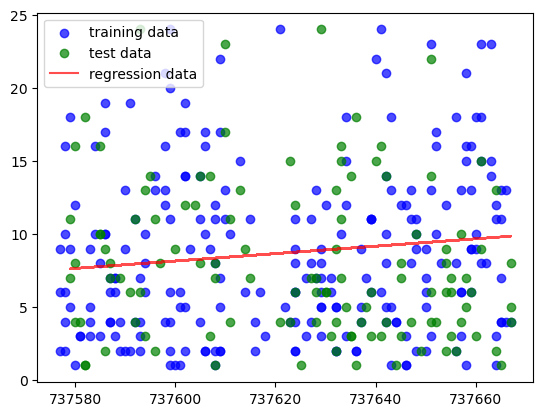

Mean Squared Error: 30.434135450473484


In [133]:
# Predict the target variable (Y) values for the test data using the trained linear regression model
Y_pred = linearRegressor.predict(X_test)

# Create a scatter plot of the training data points
plt.scatter(X_train, Y_train, label="training data", alpha=0.7, color='blue')
plt.scatter(X_test, Y_test, label="test data", alpha=0.7, color='green')

# Create a line plot showing the model's predictions for the test data
# This line represents the regression model's prediction for the test data points
plt.plot(X_test, Y_pred, label="regression data", alpha=0.7, color="red")

plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) for the test data
# MSE measures the average squared difference between actual and predicted values for the test data
mse = metrics.mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

In [134]:
# Calculate the R-squared (R2) score
# The R2 score is a measure of how well the model fits the data- a higher R2 score indicates a better fit
r2 = r2_score(Y_test, Y_pred)
r2InPercent = round(r2*100)
print(f'R-squared (R2) Score: {r2InPercent}')

R-squared (R2) Score: -8


## Conclusion
The negative r2 score is indicating that the linear regression model is performing worse than a horizontal line (a horizontal line would have an R2 score of 0). 

In other words, the model is a poor fit for the data, and it doesn't explain the variation in the dependent variable well. 

A negative R2 score can occur when the model's predictions are so far from the actual data that it performs worse than a very simple model that just predicts the mean of the dependent variable. In practice, negative R2 scores are rare and are typically a sign of a poorly fitting model or a data issue. 

In [135]:
# Look at the correlation
df.corr()

,Dato,Linjenavn,Passasjerer_Ombord
Dato,1.000000,NaN,0.031023
Linjenavn,NaN,NaN,NaN
Passasjerer_Ombord,0.031023,NaN,1.000000


Looking at the correlation insights into the relationships between our numerical variables in the dataset, we can see that there are a few NaN values. This typically indicates that there are missing values in the data or that one of the variables involved does not have enough variation (e.g., constant values) to compute a meaningful correlation.

This can affect the R2 score in a linear regression model, however, they are not the primary cause of a negative R2 score. 

A negative R2 score usually arises from the model's inability to explain the variation in the dependent variable, which can be due to factors such as:
* Poor model fit: The linear model may not be appropriate for the data, and a different type of model may be required.
* Missing or irrelevant features: If key features are missing or irrelevant to the dependent variable, the model's performance can be negatively impacted.
* Data issues: Outliers, measurement errors, or other data quality issues can negatively affect model performance.
* Randomness or noise: Some datasets may contain high levels of randomness or noise, making it difficult for any model to provide meaningful predictions.

To improve the negative R2 score, I would need to thoroughly assess the model, the data, and the features to identify the underlying issues.